## Praca domowa 4

### Autor: Tymoteusz Barciński

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [108]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie. 

In [3]:
df[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]["Name"].unique()

array(['Mario & Sonic at the Rio 2016 Olympic Games', 'Teddy Together'],
      dtype=object)

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [13]:
df.head()
df.loc[df.Year == 2010.0].groupby("Genre").Global_Sales.agg("sum").sort_values(ascending = False).index[0]

'Action'

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [23]:
df1 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].agg("mean").reset_index()
df1 = df1.loc[df1.JP_Sales > df1.EU_Sales].sort_values(by = "JP_Sales", ascending= False) \
    .rename(columns={"Genre": "Typ Gry", "JP_Sales": "Średnia sprzedaż w Japonii"}).iloc[:, 0:2]
df1

,Typ Gry,Średnia sprzedaż w Japonii
7,Role-Playing,0.238293
5,Puzzle,0.099439
11,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [34]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl

### 1) oryginalny wykres wraz ze źródłem

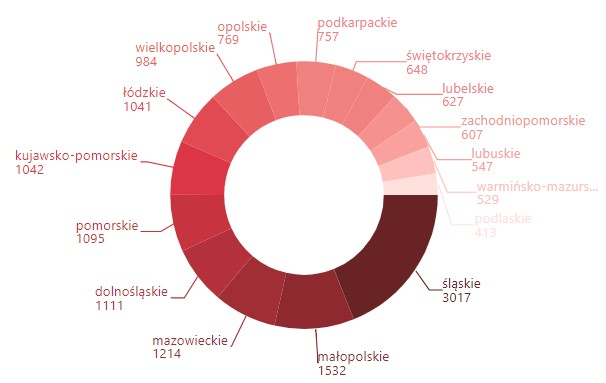

In [29]:
Image(filename="oryginalny.png")
# źródło: koronawirusunas.pl, dane z dnia 3 listopada 2021

### 2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił

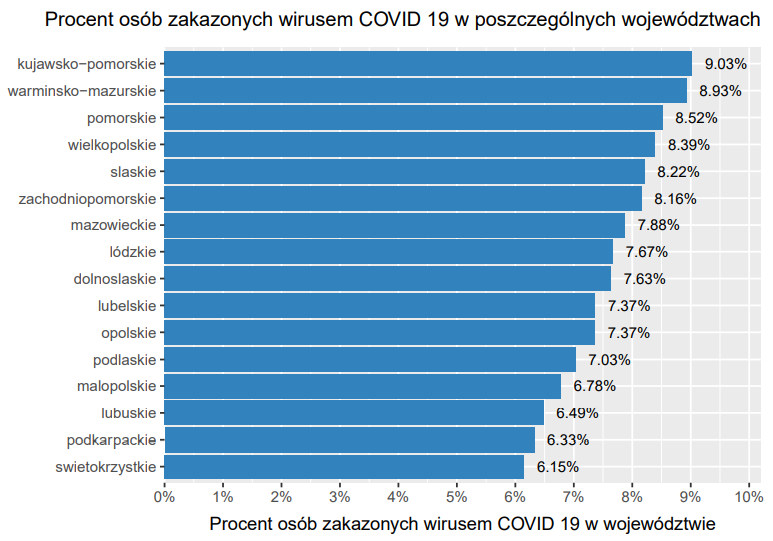

In [30]:
Image(filename="wykres_ggplot.png")
# link do pracy domowej: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/BarcinskiTymoteusz/hw2_Barcinski.pdf

### 3) poprawiony wykres z punktu 2) w Pythonie

In [ ]:
data = {"wojewodztwa": ["podlaskie", "warmińsko-mazurskie", "lubuskie", "zachodniopomorskie",
                 "lubelskie", "swiętokrzystkie", "podkarpackie", "opolskie", 
                 "wielkopolskie", "łódzkie", "kujawsko-pomorskie", "pomorskie",
                 "dolnolnośląskie","mazowieckie", "małopolskie", "śląskie"],
        "liczba_zakazonych_na_100km2": [408, 527, 545, 604, 619, 646, 753, 766, 982, 1036, 1038,
                       1091, 1107, 1205, 1526, 3007],
        "gestosc_zaludnienia_na_1km2": [58, 59, 84, 74, 84, 105, 119, 104, 117, 135, 115, 128,
                                 145, 153, 225, 366]}
df = pd.DataFrame(data)
df["procent_zakazonych"] = ((df.liczba_zakazonych_na_100km2 / (df.gestosc_zaludnienia_na_1km2 * 100)) * 100).round(2)
df.head()

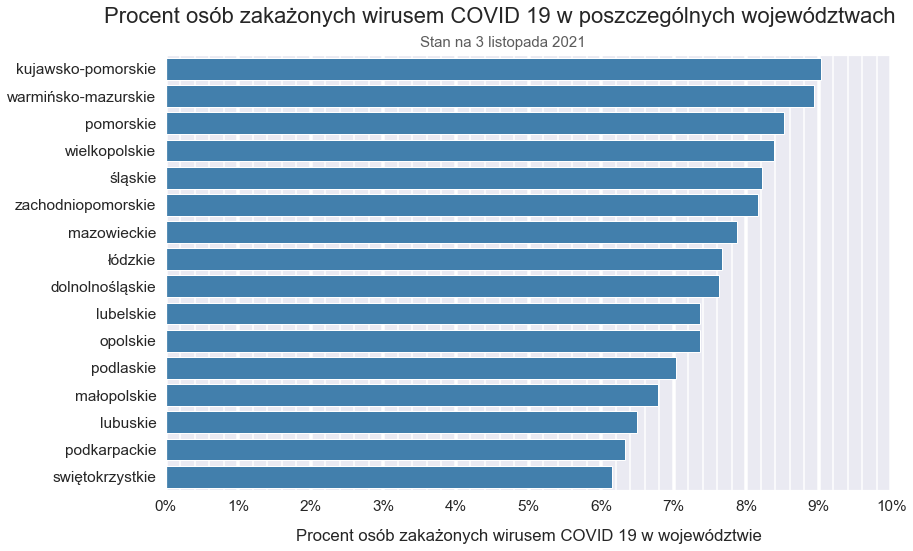

In [106]:
df1 = df.sort_values(by = "procent_zakazonych", ascending=False)

sns.set_style("darkgrid", {"axes.facecolor": ".99"})
sns.set(font_scale = 1.4)
sns.set_context(rc={"grid.linewidth": 3.5})
plt.rcParams["figure.figsize"]=13,8

plot = sns.barplot(data = df1, x = "procent_zakazonych", y = "wojewodztwa",
                   color="#3182bd")
plot.set(ylabel = None,
         xlabel = "Procent osób zakażonych wirusem COVID 19 w województwie"
         )
plot.axes.set_title("Procent osób zakażonych wirusem COVID 19 w poszczególnych województwach",
                    fontsize=22)
plot.set_xticks(range(0,11))
plot.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
plot.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plot.grid(b=True, which='minor', color='w', linewidth= 1.5)
plot.title.set_position([.46, 1.06])
plot.text(x=3.5, y=-0.8, s='Stan na 3 listopada 2021', fontsize=15, alpha=0.75)
plot.xaxis.labelpad = 15
plot

### 4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Wykres 3) różni się od wykresu 2) tylko jedną rzeczą. Mianowicie, na powyższym wykresie nie zostały uwzględnione etykiety z dokładnymi wartościami dla każdego słupka. Zgodnie z zasadami poprawnej wizualizacji danych, powinno się przekazywać jedną informację za pomocą jednej techniki. W przypadku wykresu 3) informacja o wartości słupka jest wyrażona za pomocą jego długości, która może być odczytana z osi poziomej. W związku z tym, dodanie etykiety przy każdym słupku jest zbędne. Ponadto, do wykresu 3) została dodana data. Ze względu na nieznaczne różnice z wykresem 2), Wykres 3) jest lepszy od wykresu 1) na mocy argumentów przytoczonych w pracy domowej numer 2. Pozowlę sobie ich nie powtarzać.
Natomiast ocenę, który z wykresów słupkowych jest przyjemniejszy w odbiorze pozostawiam czytelnikowi.